In [33]:
import pandas as pd
from scipy import stats
import numpy as np # linear algebra
import seaborn as sns
import matplotlib.pyplot as plt
color = sns.color_palette()
%matplotlib inline

In [9]:
p=pd.read_csv('D:\\data\\properties_2016.csv', dtype={'hashottuborspa':'bool','propertycountylandusecode':'object','propertyzoningdesc':'object', 'fireplaceflag':'bool', 'taxdelinquencyflag':'object'})
p.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


In [10]:
p.describe()

D:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,yardbuildingsqft26,yearbuilt,numberofstories,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyyear,censustractandblock
count,2.985217e+06,811519.000000,6061.000000,1628.000000,2.973755e+06,2.973767e+06,12629.000000,1.938488e+06,2.856305e+06,17096.0,...,2647.000000,2.925289e+06,682069.000000,2.930235e+06,2.942667e+06,2.973778e+06,2.917484e+06,2.953967e+06,56464.000000,2.910091e+06
mean,1.332586e+07,1.931166,7.202607,646.883292,2.209143e+00,3.088949e+00,3.725948,5.784787e+00,2.299263e+00,66.0,...,278.296562,1.964262e+03,1.401464,1.708836e+05,4.204790e+05,2.014999e+03,2.524780e+05,5.377607e+03,13.892409,6.048431e+13
std,7.909966e+06,3.148587,2.436290,538.793473,1.077754e+00,1.275859e+00,0.501700,1.805352e+00,1.000736e+00,0.0,...,369.731508,2.344132e+01,0.539076,4.020683e+05,7.263467e+05,3.683161e-02,4.450132e+05,9.183107e+03,2.581006,3.249035e+11
min,1.071172e+07,1.000000,2.000000,20.000000,0.000000e+00,0.000000e+00,1.000000,1.000000e+00,1.000000e+00,66.0,...,10.000000,1.801000e+03,1.000000,1.000000e+00,1.000000e+00,2.000000e+03,1.000000e+00,1.340000e+00,0.000000,-1.000000e+00
25%,1.164371e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.254509e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.409712e+07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1.696019e+08,13.000000,27.000000,8516.000000,2.000000e+01,2.000000e+01,5.000000,1.200000e+01,2.000000e+01,66.0,...,6141.000000,2.015000e+03,41.000000,2.514860e+08,2.827860e+08,2.016000e+03,9.024622e+07,3.458861e+06,99.000000,4.830301e+14


In [11]:
p.shape

(2985217, 58)

In [13]:
train=pd.read_csv('D:\\data\\train_2016.csv')
train.head()

,parcelid,logerror,transactiondate
0,11016594,0.0276,2016-01-01
1,14366692,-0.1684,2016-01-01
2,12098116,-0.0040,2016-01-01
3,12643413,0.0218,2016-01-02
4,14432541,-0.0050,2016-01-02


In [14]:
train.shape

(90811, 3)

In [29]:
train['transactiondate']=pd.to_datetime(train['transactiondate'], errors='coerce')

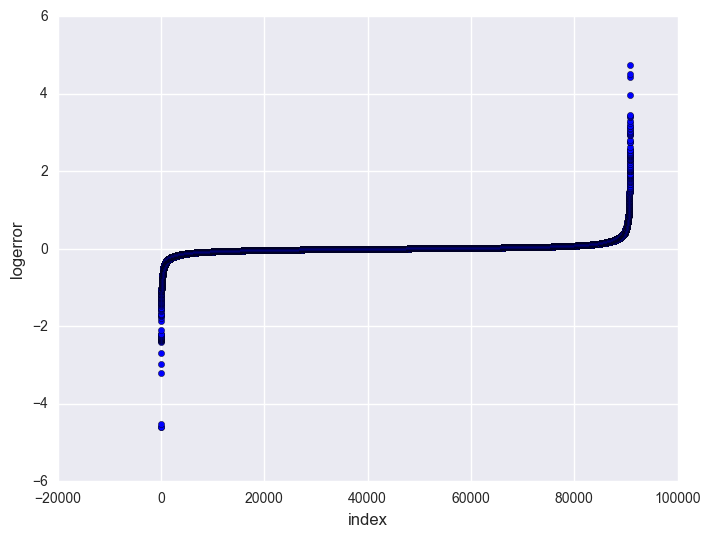

In [18]:
plt.figure(figsize=(8,6))
plt.scatter(range(train.shape[0]), np.sort(train.logerror.values))
plt.xlabel('index', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

D:\Program Files\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


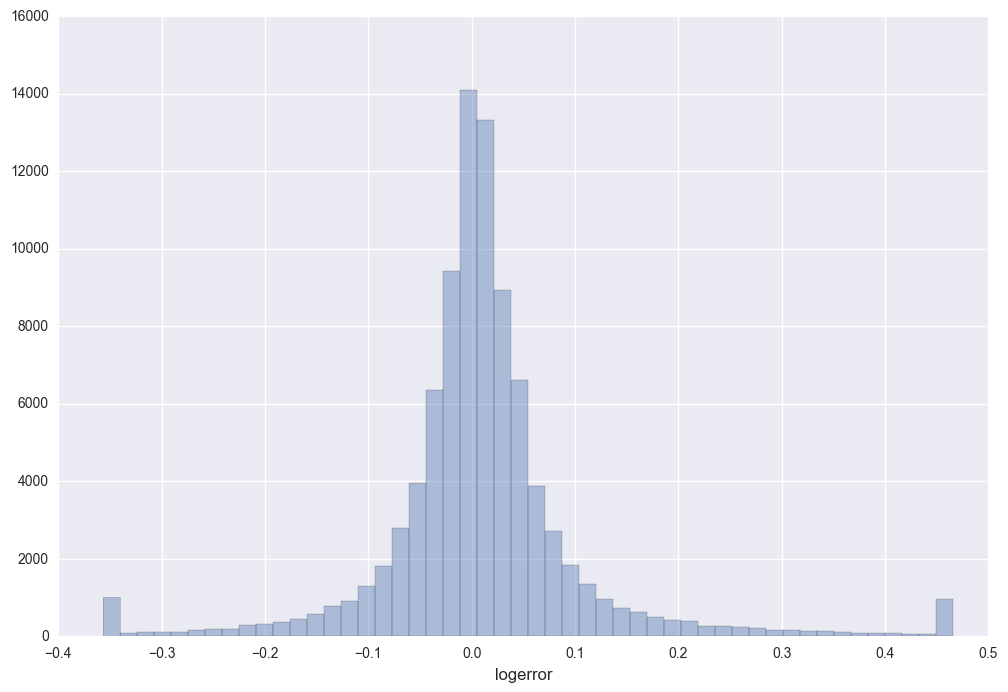

In [19]:
ulimit=np.percentile(train.logerror.values, 99)
llimit=np.percentile(train.logerror.values, 1)
train['logerror'].ix[train['logerror']>ulimit] = ulimit
train['logerror'].ix[train['logerror']<llimit] = llimit

plt.figure(figsize=(12,8))
sns.distplot(train.logerror.values, bins=50, kde=False)
plt.xlabel('logerror',fontsize=12)
plt.show()

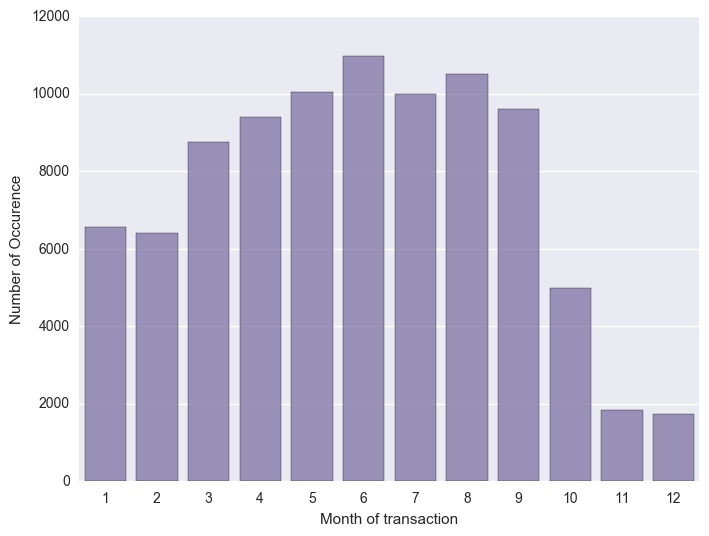

In [35]:
train['transaction_month']=train['transactiondate'].dt.month

cnt_srs=train['transaction_month'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(cnt_srs.index, cnt_srs.values, alpha=0.8, color=color[3])
plt.xlabel('Month of transaction')
plt.ylabel('Number of Occurence')
plt.show()

In [36]:
(train['parcelid'].value_counts().reset_index())['parcelid'].value_counts()

1    90554
2      127
3        1
Name: parcelid, dtype: int64

In [37]:
p.shape

(2985217, 58)

In [38]:
p.head()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,10754147,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,9.0,2015.0,9.0,NaN,NaN,NaN,NaN
1,10759547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,27516.0,2015.0,27516.0,NaN,NaN,NaN,NaN
2,10843547,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,650756.0,1413387.0,2015.0,762631.0,20800.37,NaN,NaN,NaN
3,10859147,NaN,NaN,NaN,0.0,0.0,3.0,7.0,NaN,NaN,...,1.0,NaN,571346.0,1156834.0,2015.0,585488.0,14557.57,NaN,NaN,NaN
4,10879947,NaN,NaN,NaN,0.0,0.0,4.0,NaN,NaN,NaN,...,NaN,NaN,193796.0,433491.0,2015.0,239695.0,5725.17,NaN,NaN,NaN


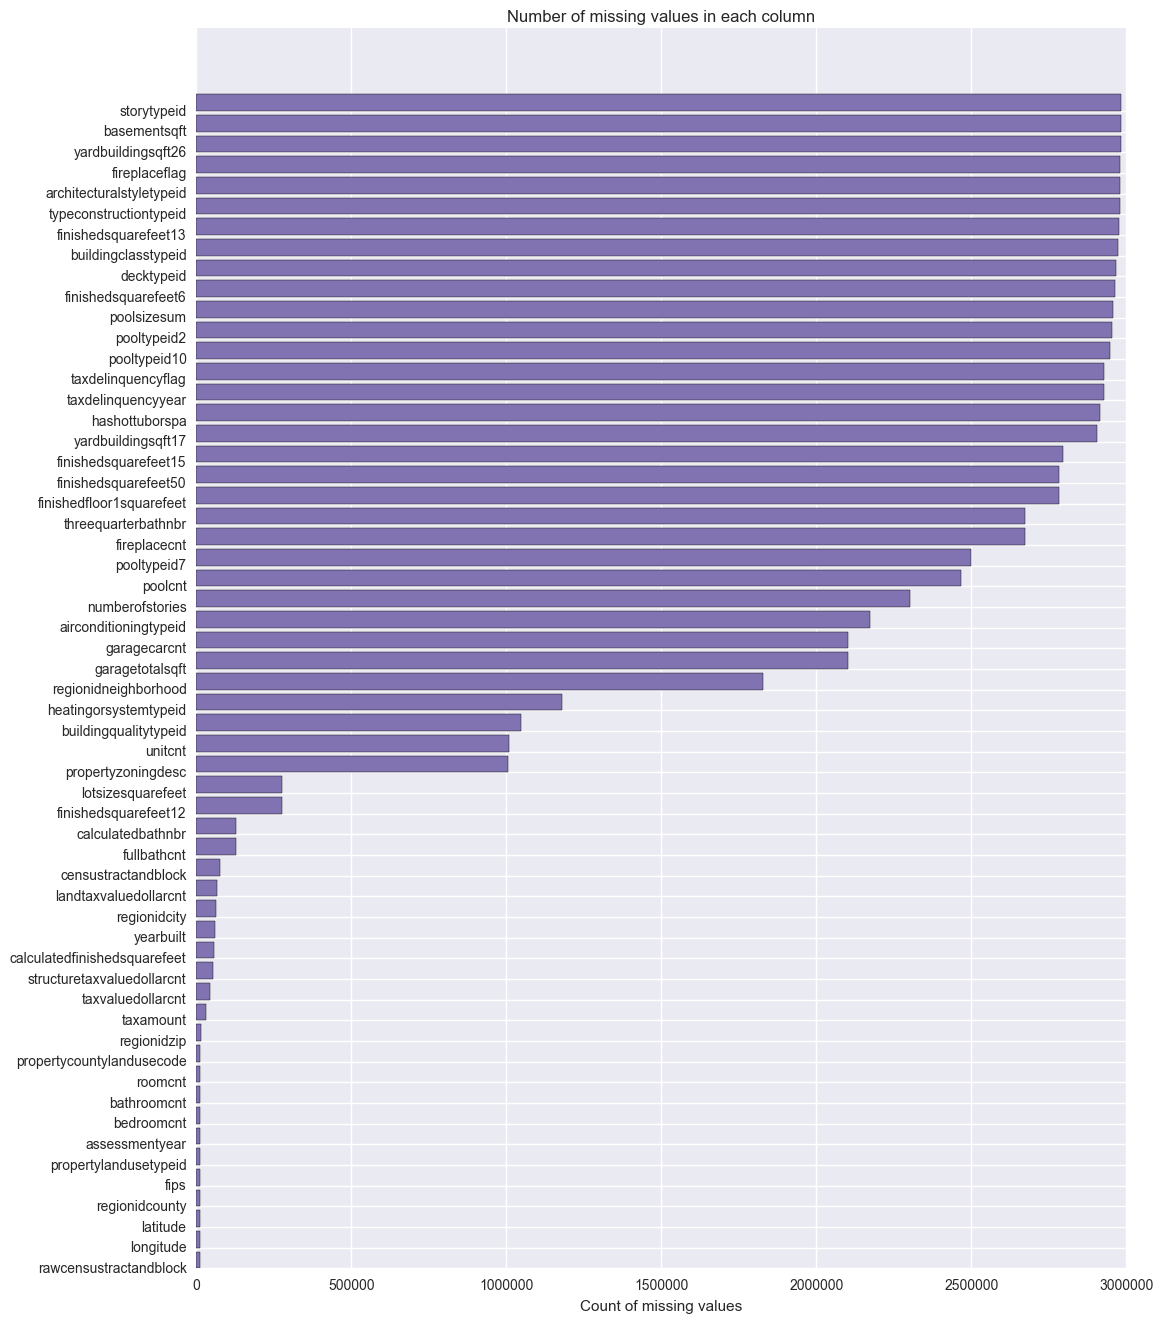

In [47]:
missing_df = p.isnull().sum(axis=0).reset_index()
missing_df.columns=['column_name', 'missing_count']
missing_df=missing_df.ix[missing_df['missing_count']>0]
missing_df=missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
fig, ax = plt.subplots(figsize=(12,16))
rects = ax.barh(ind, missing_df.missing_count.values, color=color[3])
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel('Count of missing values')
ax.set_title('Number of missing values in each column')
plt.show()

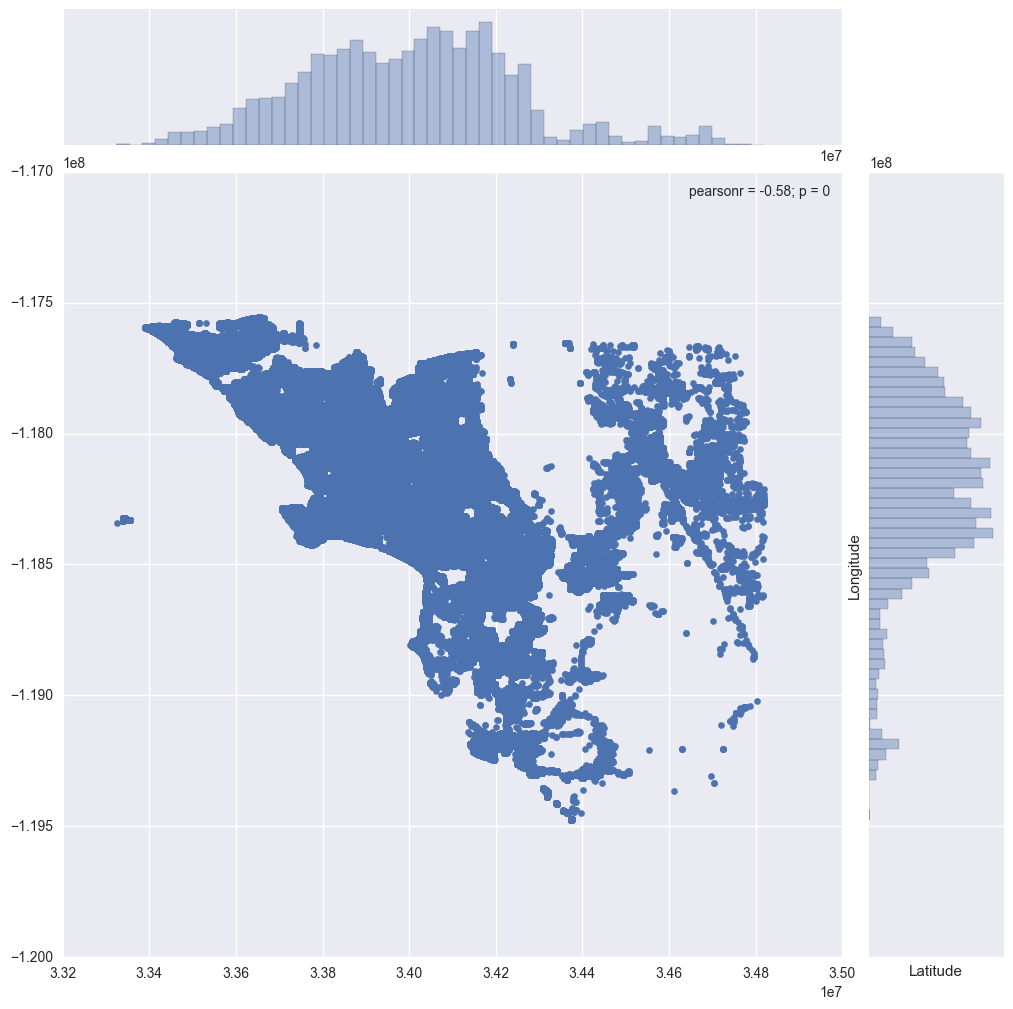

In [49]:
plt.figure(figsize=(12,12))
sns.jointplot(x=p.latitude.values, y=p.longitude.values, size=10)
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.show()

In [50]:
train_df=pd.merge(train, p, on='parcelid', how='left')
train_df.head()

,parcelid,logerror,transactiondate,transaction_month,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
0,11016594,0.0276,2016-01-01,1,1.0,NaN,NaN,2.0,3.0,NaN,...,NaN,NaN,122754.0,360170.0,2015.0,237416.0,6735.88,NaN,NaN,6.037107e+13
1,14366692,-0.1684,2016-01-01,1,NaN,NaN,NaN,3.5,4.0,NaN,...,NaN,NaN,346458.0,585529.0,2015.0,239071.0,10153.02,NaN,NaN,NaN
2,12098116,-0.0040,2016-01-01,1,1.0,NaN,NaN,3.0,2.0,NaN,...,NaN,NaN,61994.0,119906.0,2015.0,57912.0,11484.48,NaN,NaN,6.037464e+13
3,12643413,0.0218,2016-01-02,1,1.0,NaN,NaN,2.0,2.0,NaN,...,NaN,NaN,171518.0,244880.0,2015.0,73362.0,3048.74,NaN,NaN,6.037296e+13
4,14432541,-0.0050,2016-01-02,1,NaN,NaN,NaN,2.5,4.0,NaN,...,2.0,NaN,169574.0,434551.0,2015.0,264977.0,5488.96,NaN,NaN,6.059042e+13


In [56]:
pd.options.display.max_rows = 65
dtypes_df = train_df.dtypes.reset_index()
dtypes_df.columns = ['Count', 'Column Type']
dtypes_df

,Count,Column Type
0,parcelid,int64
1,logerror,float64
2,transactiondate,datetime64[ns]
3,transaction_month,int64
4,airconditioningtypeid,float64
5,architecturalstyletypeid,float64
6,basementsqft,float64
7,bathroomcnt,float64
8,bedroomcnt,float64
9,buildingclasstypeid,float64


In [64]:
dtypes_df.groupby('Column Type').aggregate('count').reset_index()

,Column Type,Count
0,int64,2
1,float64,53
2,datetime64[ns],1
3,object,5


In [71]:
missing_df = train_df.isnull().sum(axis=0).reset_index()
missing_df.columns=['column_name', 'missing_count']
missing_df['missing_ratio'] = missing_df['missing_count']/train_df.shape[0]
missing_df.ix[missing_df['missing_ratio']>0.999]

,column_name,missing_count,missing_ratio
6,basementsqft,90768,0.999526
9,buildingclasstypeid,90795,0.999824
16,finishedsquarefeet13,90778,0.999637
44,storytypeid,90768,0.999526


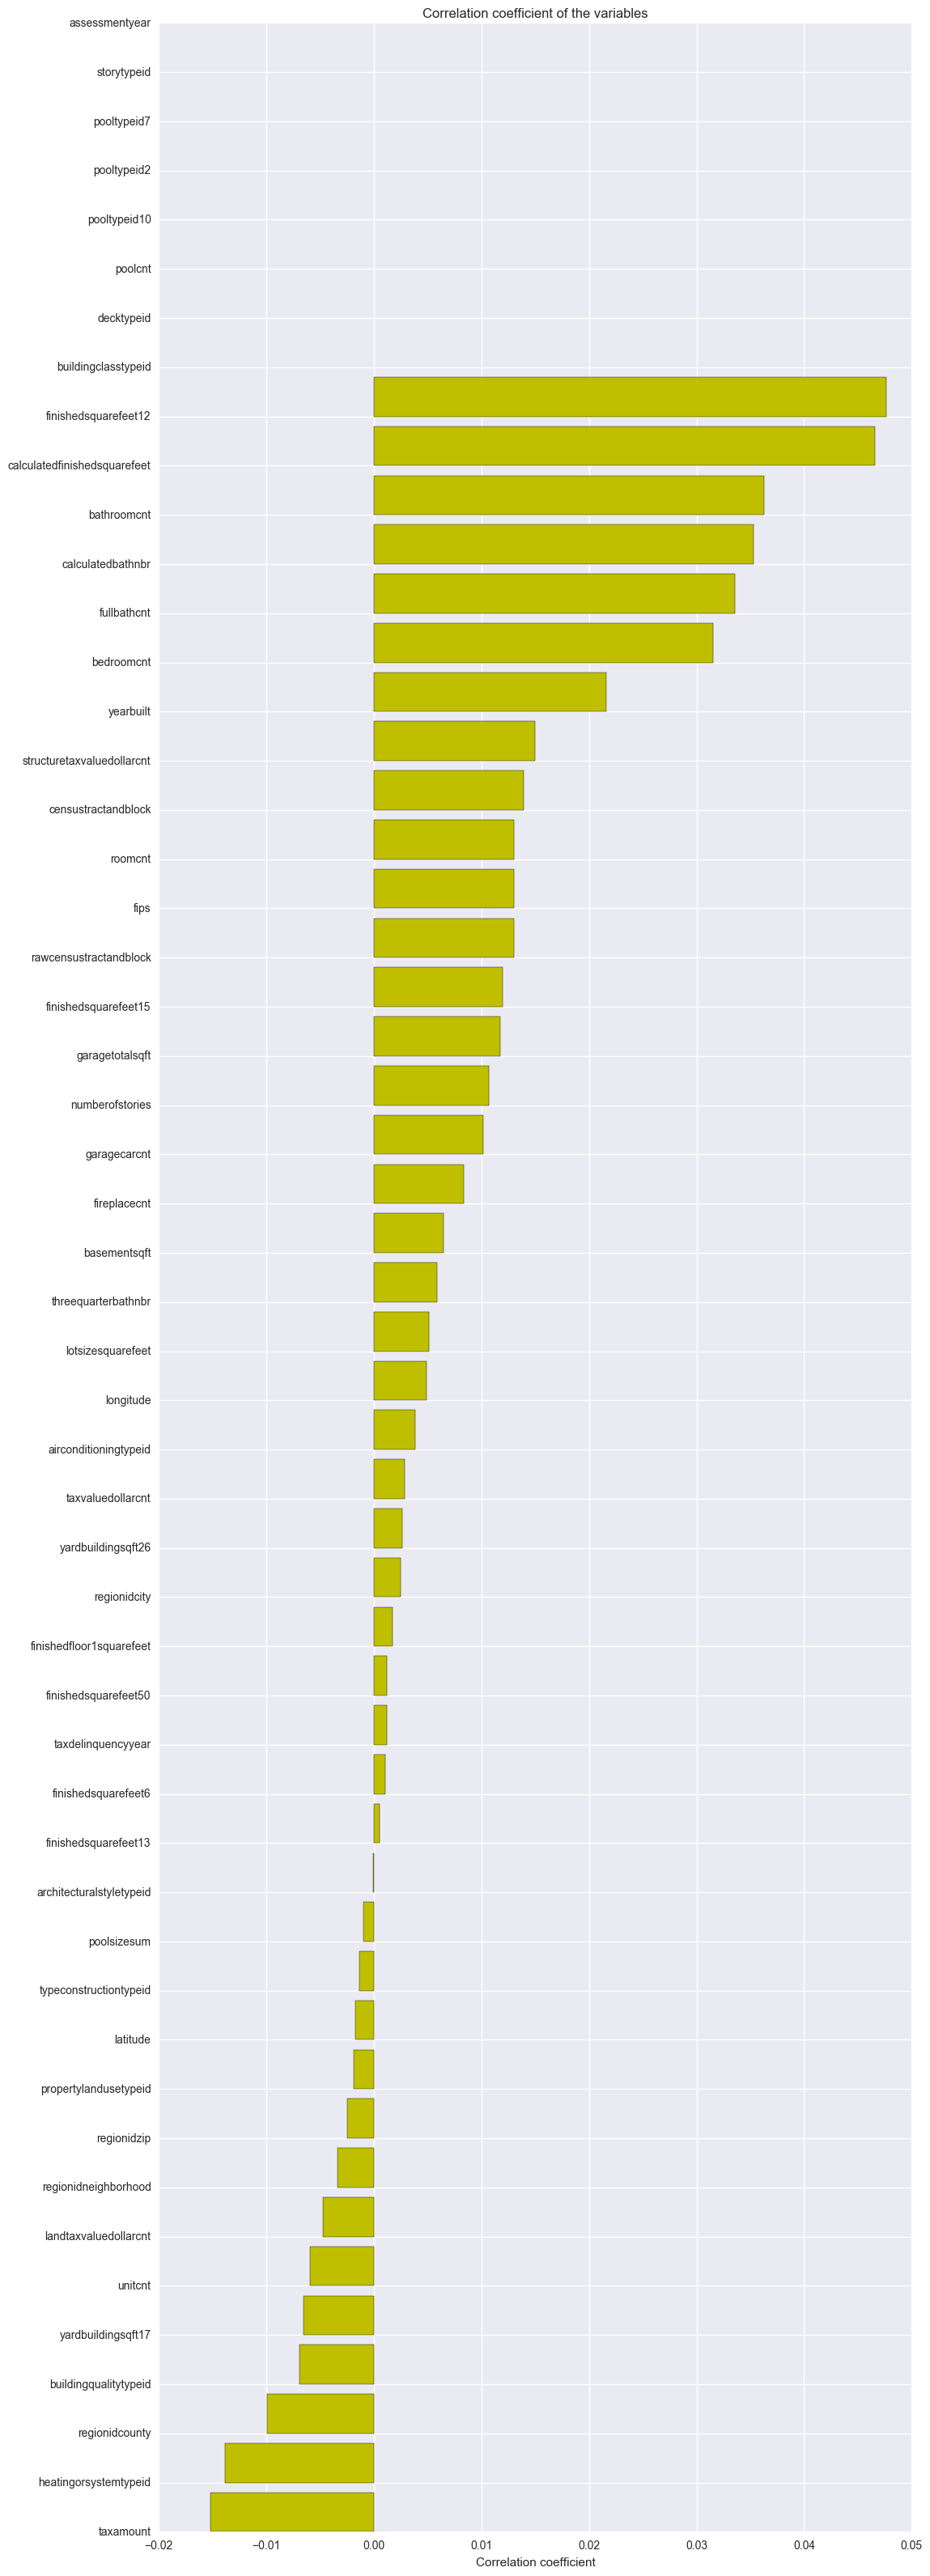

In [84]:
mean_values=train_df.mean(axis=0)
train_df_new = train_df.fillna(mean_values, inplace=True)

x_cols = [col for col in train_df_new.columns if col not in ['logerror'] if train_df_new[col].dtype=='float64']

labels=[]
values=[]
for col in x_cols:
    labels.append(col)
    values.append(np.corrcoef(train_df_new[col].values, train_df_new.logerror.values)[0,1])
corr_df = pd.DataFrame({'col_label':labels, 'corr_values':values})
corr_df = corr_df.sort_values(by='corr_values')

ind = np.arange(len(corr_df))
fig, ax = plt.subplots(figsize=(12,40))
rects = ax.barh(ind, np.array(corr_df.corr_values.values), color='y')
ax.set_yticks(ind)
ax.set_yticklabels(corr_df.col_label.values, rotation='horizontal')
ax.set_xlabel('Correlation coefficient')
ax.set_title('Correlation coefficient of the variables')
plt.show()

In [85]:
corr_zero_cols = ['assessmentyear', 'storytypeid', 'pooltypeid2', 'pooltypeid7', 'pooltypeid10', 'poolcnt', 'decktypeid', 'buildingclasstypeid']
for col in corr_zero_cols:
    print(col, len(train_df_new[col].unique()))

assessmentyear 1
storytypeid 1
pooltypeid2 1
pooltypeid7 1
pooltypeid10 1
poolcnt 1
decktypeid 1
buildingclasstypeid 1


In [86]:
corr_df_sel = corr_df.ix[(corr_df['corr_values']>0.02) | (corr_df['corr_values']<-0.01)]
corr_df_sel

,col_label,corr_values
49,taxamount,-0.015226
21,heatingorsystemtypeid,-0.013859
43,yearbuilt,0.021631
4,bedroomcnt,0.031530
18,fullbathcnt,0.033543
7,calculatedbathnbr,0.035301
3,bathroomcnt,0.036250
10,calculatedfinishedsquarefeet,0.046600
11,finishedsquarefeet12,0.047669


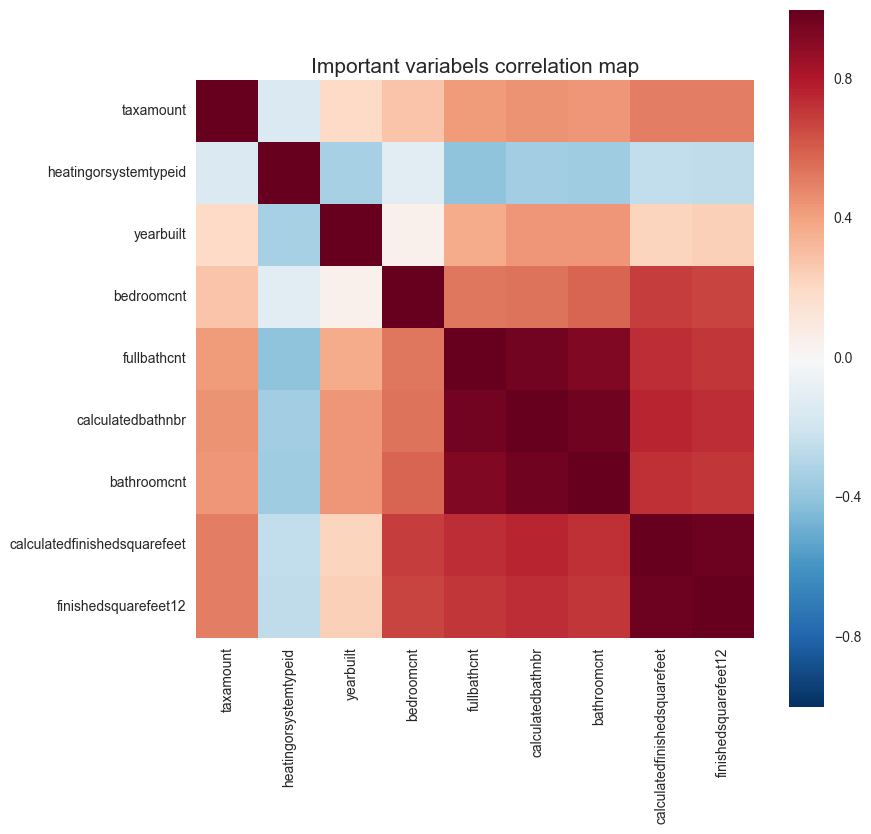

In [93]:
cols_to_use=corr_df_sel.col_label.tolist()
temp_df = train_df[cols_to_use]
corrmat = temp_df.corr(method='spearman')
f, ax = plt.subplots(figsize=(9,9))
sns.heatmap(corrmat, vmax=1., square=True)
plt.title("Important variabels correlation map", fontsize=15)
plt.show()

D:\Program Files\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


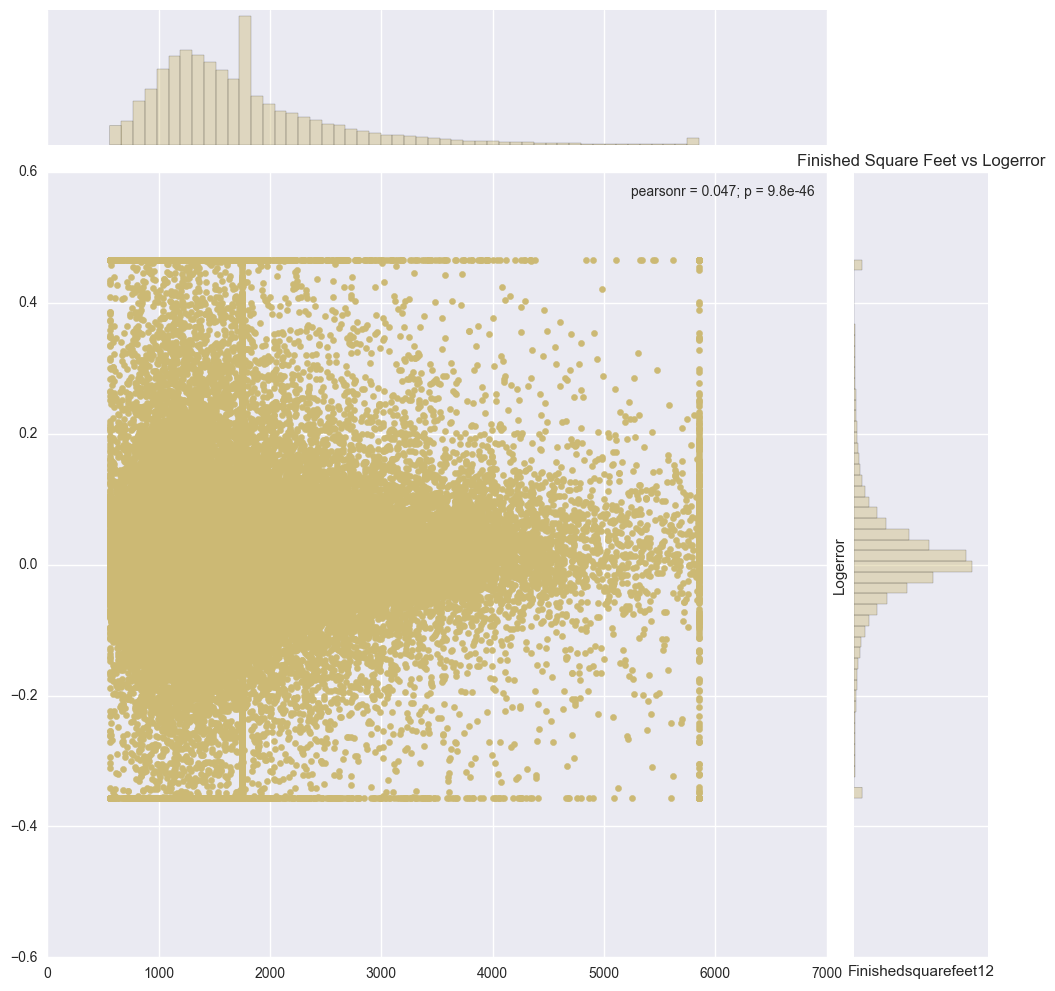

In [95]:
col='finishedsquarefeet12'
ulimit=np.percentile(train_df[col].values, 99.5)
llimit=np.percentile(train_df[col].values, 0.5)
train_df[col].ix[train_df[col]>ulimit]=ulimit
train_df[col].ix[train_df[col]<llimit]=llimit

plt.figure(figsize=(8,8))
sns.jointplot(x=train_df[col].values, y=train_df.logerror.values,size=10, color=color[4])
plt.ylabel('Logerror')
plt.xlabel('Finishedsquarefeet12')
plt.title('Finished Square Feet vs Logerror')
plt.show()

D:\Program Files\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


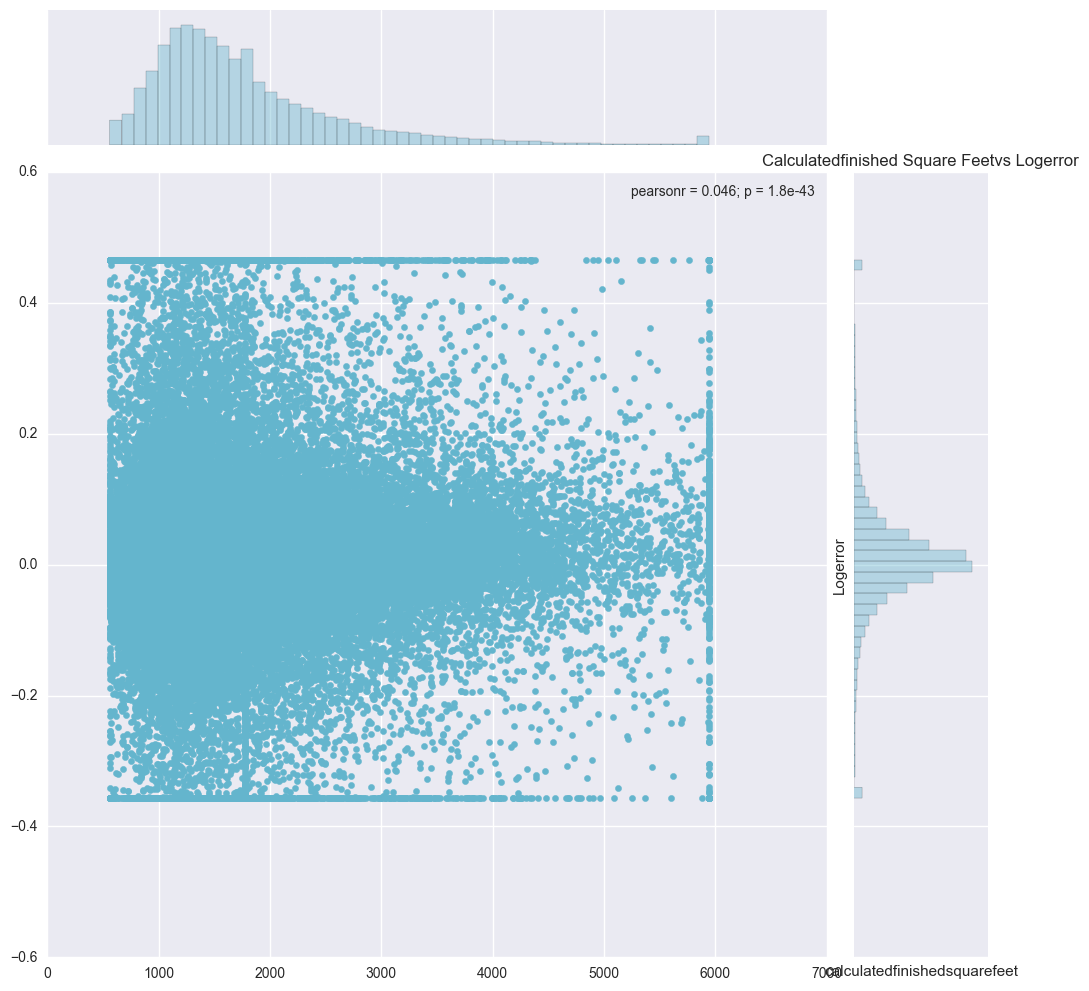

In [97]:
col='calculatedfinishedsquarefeet'
ulimit=np.percentile(train_df[col].values, 99.5)
llimit=np.percentile(train_df[col].values, 0.5)
train_df[col].ix[train_df[col]>ulimit]=ulimit
train_df[col].ix[train_df[col]<llimit]=llimit

plt.figure(figsize=(8,8))
sns.jointplot(x=train_df[col].values, y=train_df.logerror.values,size=10, color=color[5])
plt.ylabel('Logerror')
plt.xlabel('calculatedfinishedsquarefeet')
plt.title('Calculatedfinished Square Feetvs Logerror')
plt.show()

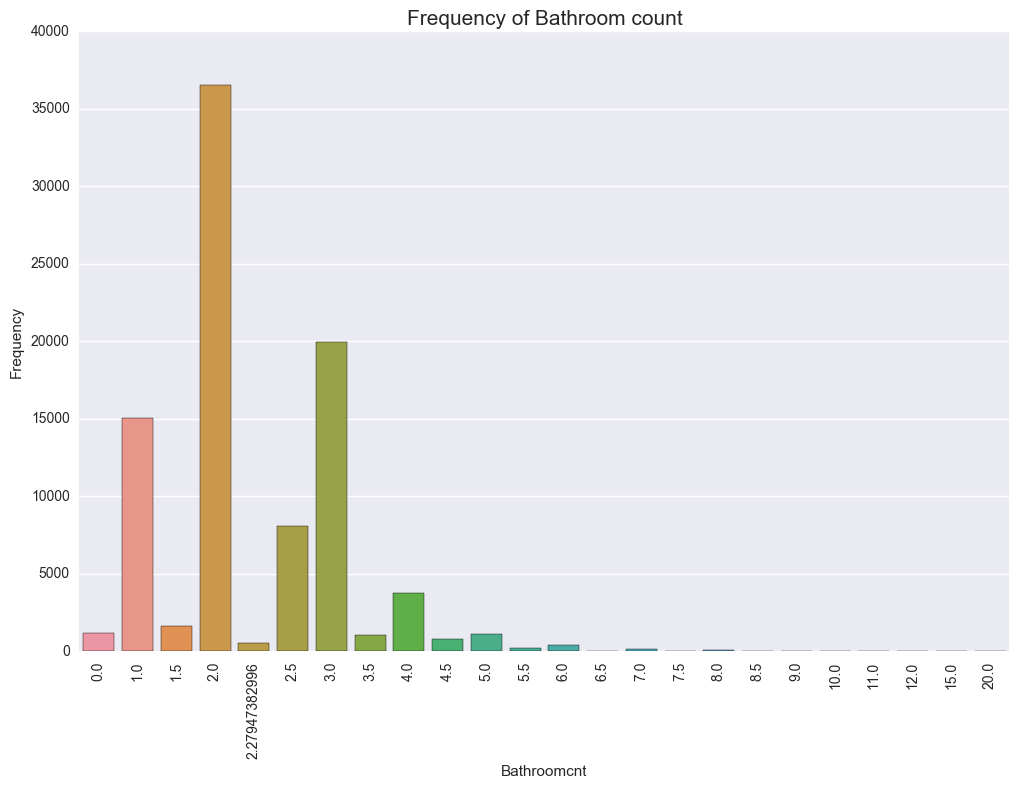

In [99]:
plt.figure(figsize=(12,8))
sns.countplot(x='bathroomcnt', data=train_df)
plt.ylabel('Frequency')
plt.xlabel('Bathroomcnt')
plt.xticks(rotation='vertical')
plt.title('Frequency of Bathroom count', fontsize=15)
plt.show()

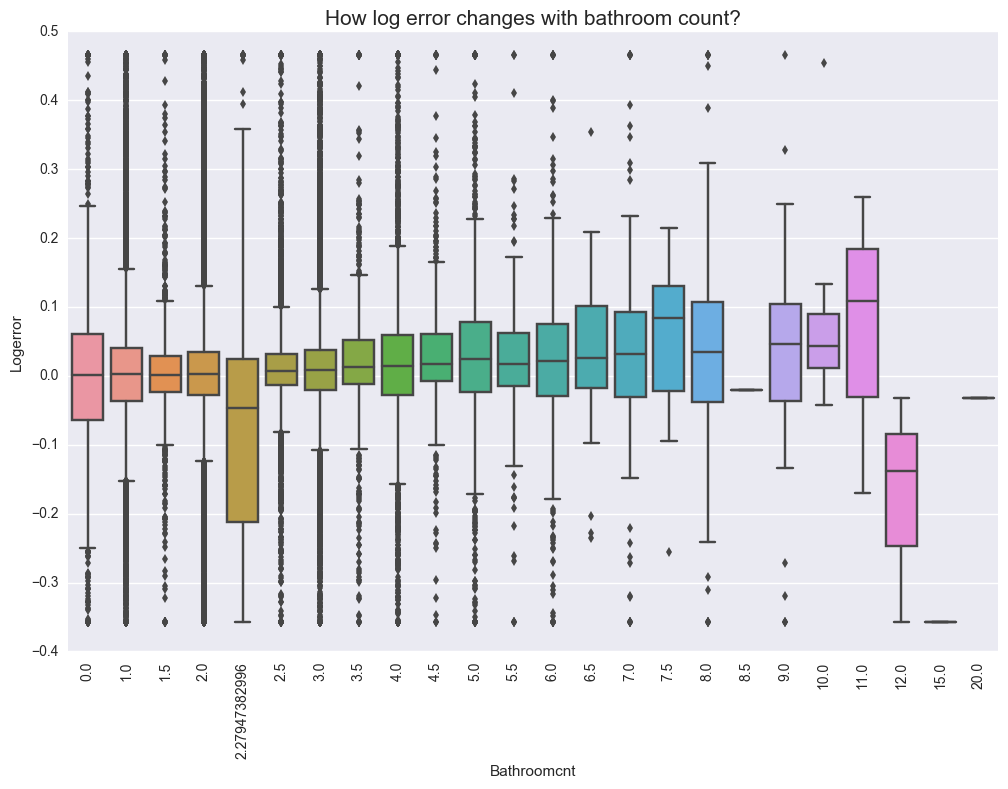

In [100]:
plt.figure(figsize=(12,8))
sns.boxplot(x='bathroomcnt', y='logerror', data=train_df)
plt.ylabel('Logerror')
plt.xlabel('Bathroomcnt')
plt.xticks(rotation='vertical')
plt.title("How log error changes with bathroom count?", fontsize=15)
plt.show()

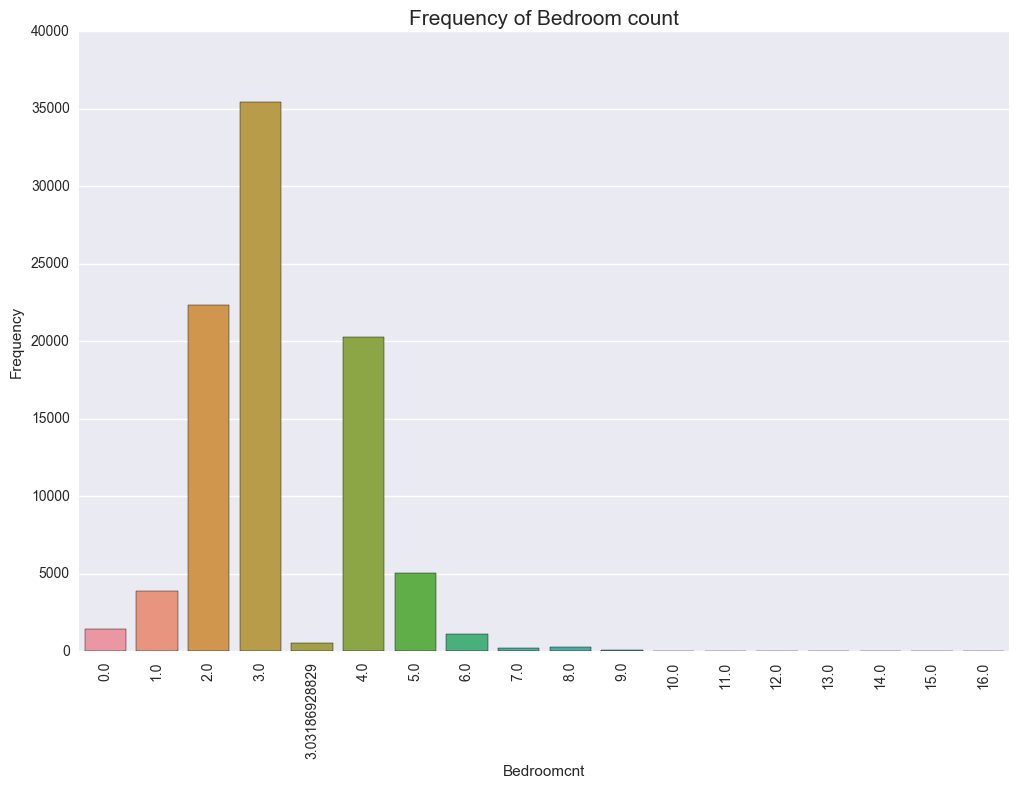

In [101]:
plt.figure(figsize=(12,8))
sns.countplot(x='bedroomcnt', data=train_df)
plt.ylabel('Frequency')
plt.xlabel('Bedroomcnt')
plt.xticks(rotation='vertical')
plt.title('Frequency of Bedroom count', fontsize=15)
plt.show()

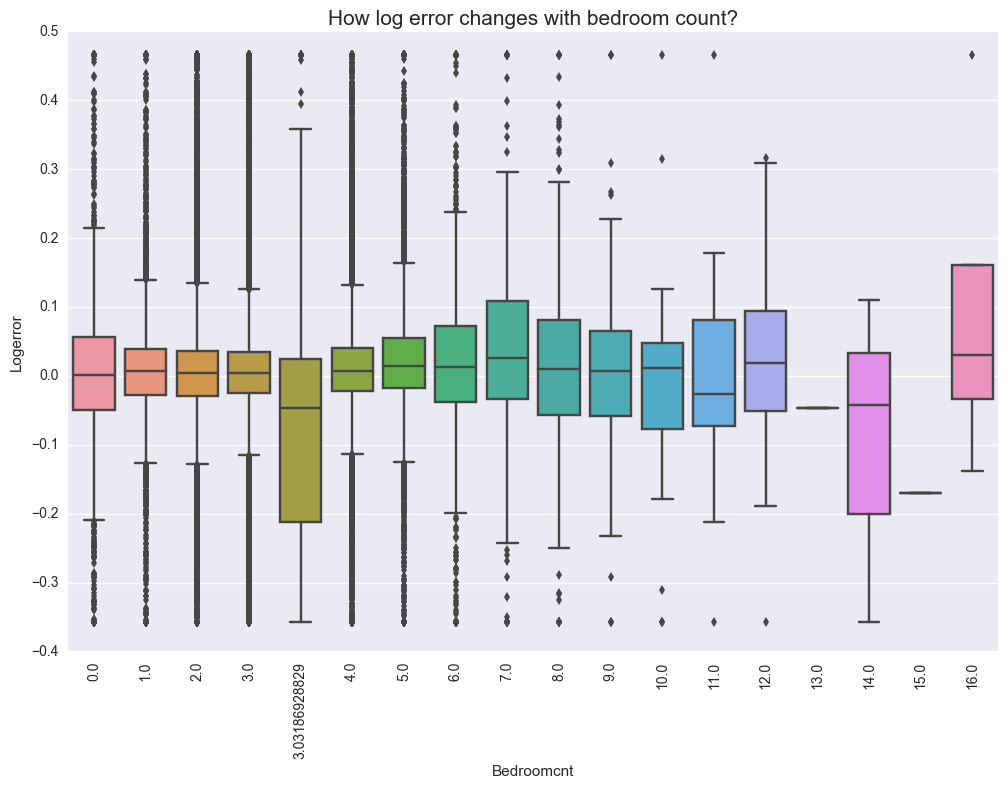

In [102]:
plt.figure(figsize=(12,8))
sns.boxplot(x='bedroomcnt', y='logerror', data=train_df)
plt.ylabel('Logerror')
plt.xlabel('Bedroomcnt')
plt.xticks(rotation='vertical')
plt.title("How log error changes with bedroom count?", fontsize=15)
plt.show()

D:\Program Files\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


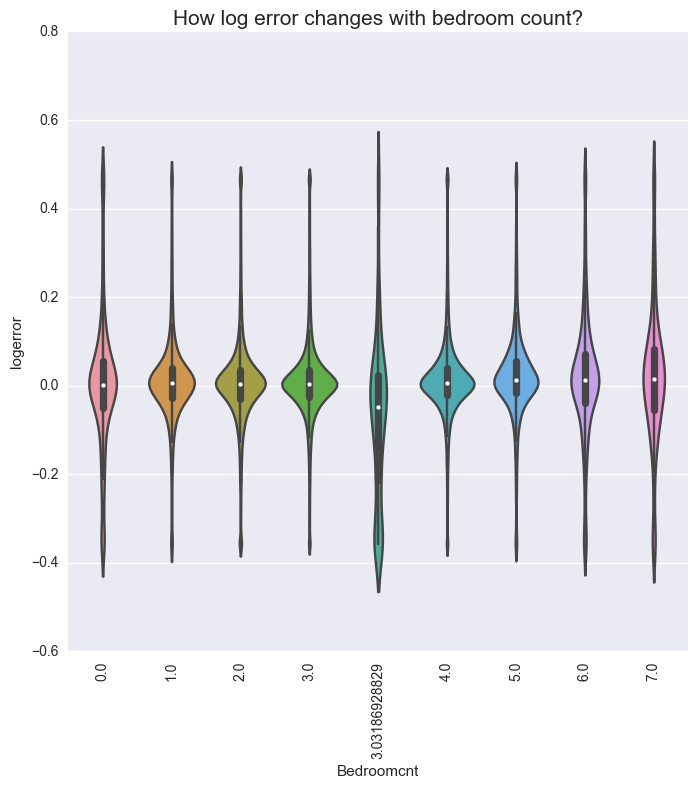

In [104]:
train_df['bedroomcnt'].ix[train_df['bedroomcnt']>7]=7
plt.figure(figsize=(8,8))
sns.violinplot(x='bedroomcnt', y='logerror', data=train_df)
plt.xlabel('Bedroomcnt')
plt.xticks(rotation='vertical')
plt.title("How log error changes with bedroom count?", fontsize=15)
plt.show()

D:\Program Files\Anaconda3\lib\site-packages\pandas\core\indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


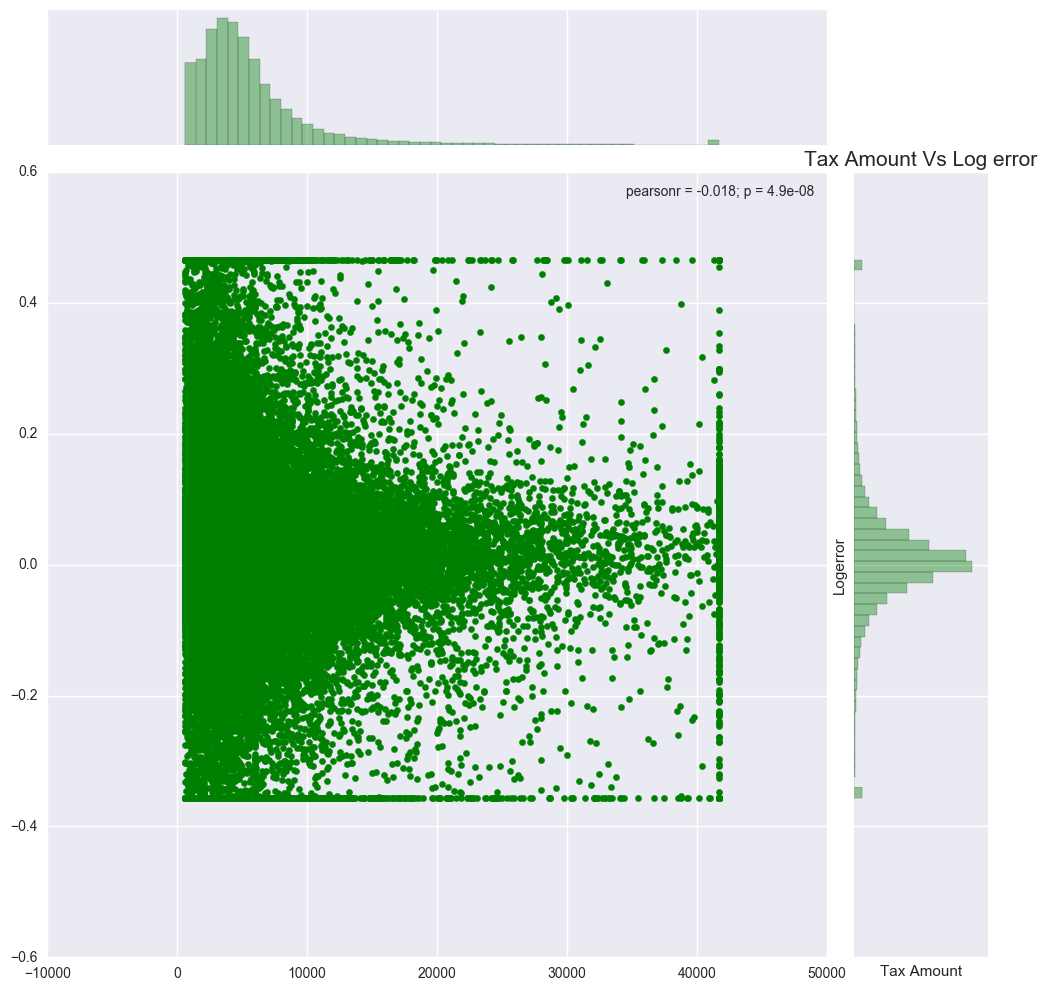

In [106]:
col='taxamount'
ulimit=np.percentile(train_df[col].values, 99.5)
llimit=np.percentile(train_df[col].values, 0.5)
train_df[col].ix[train_df[col]>ulimit]=ulimit
train_df[col].ix[train_df[col]<llimit]=llimit

plt.figure(figsize=(8,8))
sns.jointplot(x=train_df[col].values, y=train_df.logerror.values, size=10, color='g')
plt.xlabel('Tax Amount')
plt.ylabel('Logerror')
plt.title("Tax Amount Vs Log error", fontsize=15)
plt.show()

D:\Program Files\Anaconda3\lib\site-packages\ggplot\stats\stat_smooth.py:77: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  smoothed_data = smoothed_data.sort('x')


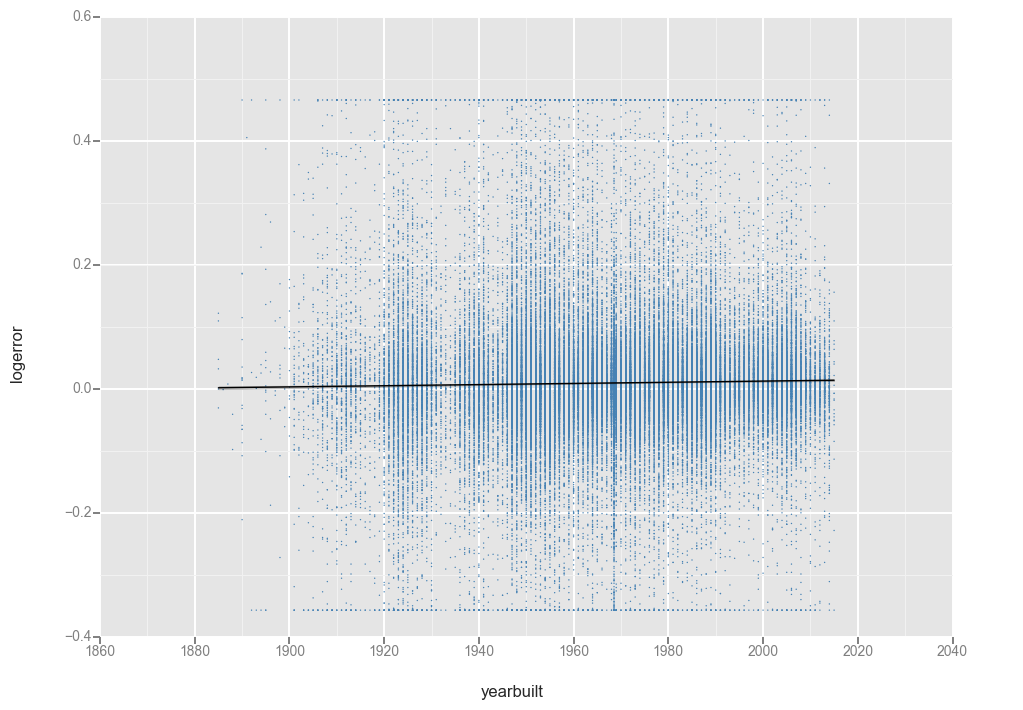

<ggplot: (105783616)>

In [109]:
from ggplot import *
ggplot(aes(x='yearbuilt', y='logerror'),  data=train_df) + \
    geom_point(color='steelblue', size=1) + \
    stat_smooth()

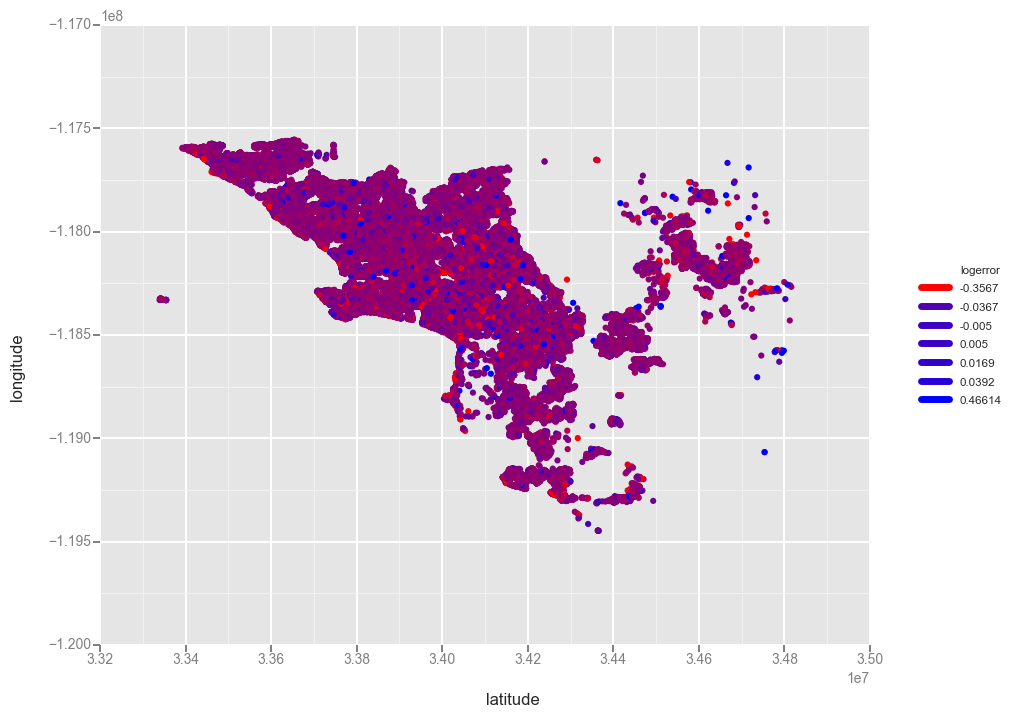

<ggplot: (136644072)>

In [110]:
ggplot(aes(x='latitude', y='longitude', color='logerror'), data=train_df) + \
    geom_point() + \
    scale_color_gradient(low='red', high='blue')

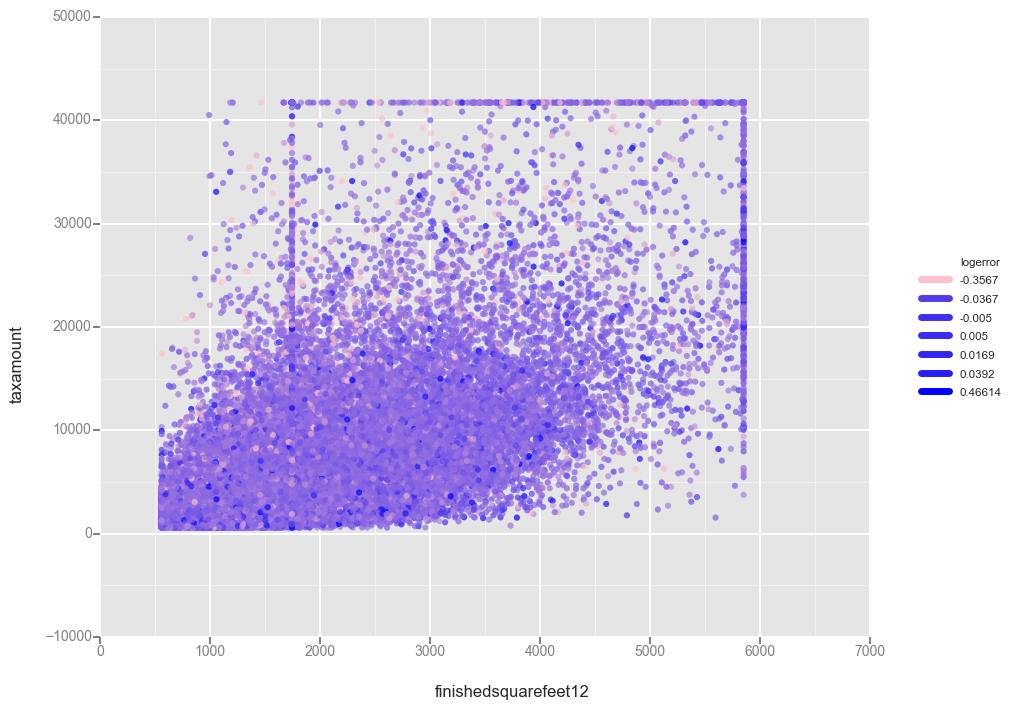

<ggplot: (-9223372036745559927)>

In [111]:
ggplot(aes(x='finishedsquarefeet12', y='taxamount', color='logerror'), data=train_df) + \
    geom_point(alpha=0.7) + \
    scale_color_gradient(low='pink', high='blue')

In [114]:
train_y = train_df['logerror'].values
cat_cols = ["hashottuborspa", "propertycountylandusecode", "propertyzoningdesc", "fireplaceflag", "taxdelinquencyflag"]   #drop object value
train_df = train_df.drop(['parcelid', 'logerror', 'transactiondate', 'transaction_month']+cat_cols, axis=1)
feat_names = train_df.columns.values

from sklearn import ensemble
model = ensemble.ExtraTreesRegressor(n_estimators=25, max_depth=30, max_features=0.3, n_jobs=-1, random_state=0)
model.fit(train_df, train_y)

importances = model.feature_importances_
importances

array([ 0.01381728,  0.00045728,  0.00077152,  0.01734589,  0.03666556,
        0.        ,  0.01916593,  0.01703671,  0.        ,  0.00334189,
        0.05234797,  0.04504688,  0.00026421,  0.00984282,  0.00339214,
        0.00296695,  0.002115  ,  0.00594118,  0.01600804,  0.00787209,
        0.0103032 ,  0.01337363,  0.05297709,  0.05374884,  0.05746302,
        0.        ,  0.00143119,  0.        ,  0.        ,  0.        ,
        0.01743353,  0.03673723,  0.03147349,  0.00191166,  0.03092195,
        0.04134463,  0.00971564,  0.        ,  0.00425164,  0.00039714,
        0.00873488,  0.00333133,  0.00050945,  0.0570122 ,  0.00717303,
        0.06081519,  0.05934181,  0.        ,  0.06001884,  0.06723992,
        0.01965413,  0.03828599])

In [115]:
std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
std

array([ 0.00158256,  0.00022578,  0.00023782,  0.00281472,  0.00462523,
        0.        ,  0.00147075,  0.00280659,  0.        ,  0.00072763,
        0.00292924,  0.00277328,  0.00016987,  0.00168247,  0.00081321,
        0.00062304,  0.00239929,  0.00111966,  0.0028124 ,  0.00130728,
        0.00163827,  0.00123345,  0.00244476,  0.00301879,  0.00319319,
        0.        ,  0.00050179,  0.        ,  0.        ,  0.        ,
        0.00166128,  0.00268601,  0.00212302,  0.00193008,  0.00221565,
        0.00209856,  0.00241571,  0.        ,  0.00076932,  0.00016316,
        0.0014696 ,  0.00083413,  0.00020479,  0.00362814,  0.00133512,
        0.00340928,  0.00255732,  0.        ,  0.00318888,  0.00256404,
        0.00206552,  0.0038356 ])

In [122]:
indices = np.argsort(importances)[::-1][:20]       #argsor 从小到大索引， [::-1] 逆序 [:20]前20个
indices

array([49, 45, 48, 46, 24, 43, 23, 22, 10, 11, 35, 51, 31,  4, 32, 34, 50,
        6, 30,  3], dtype=int64)

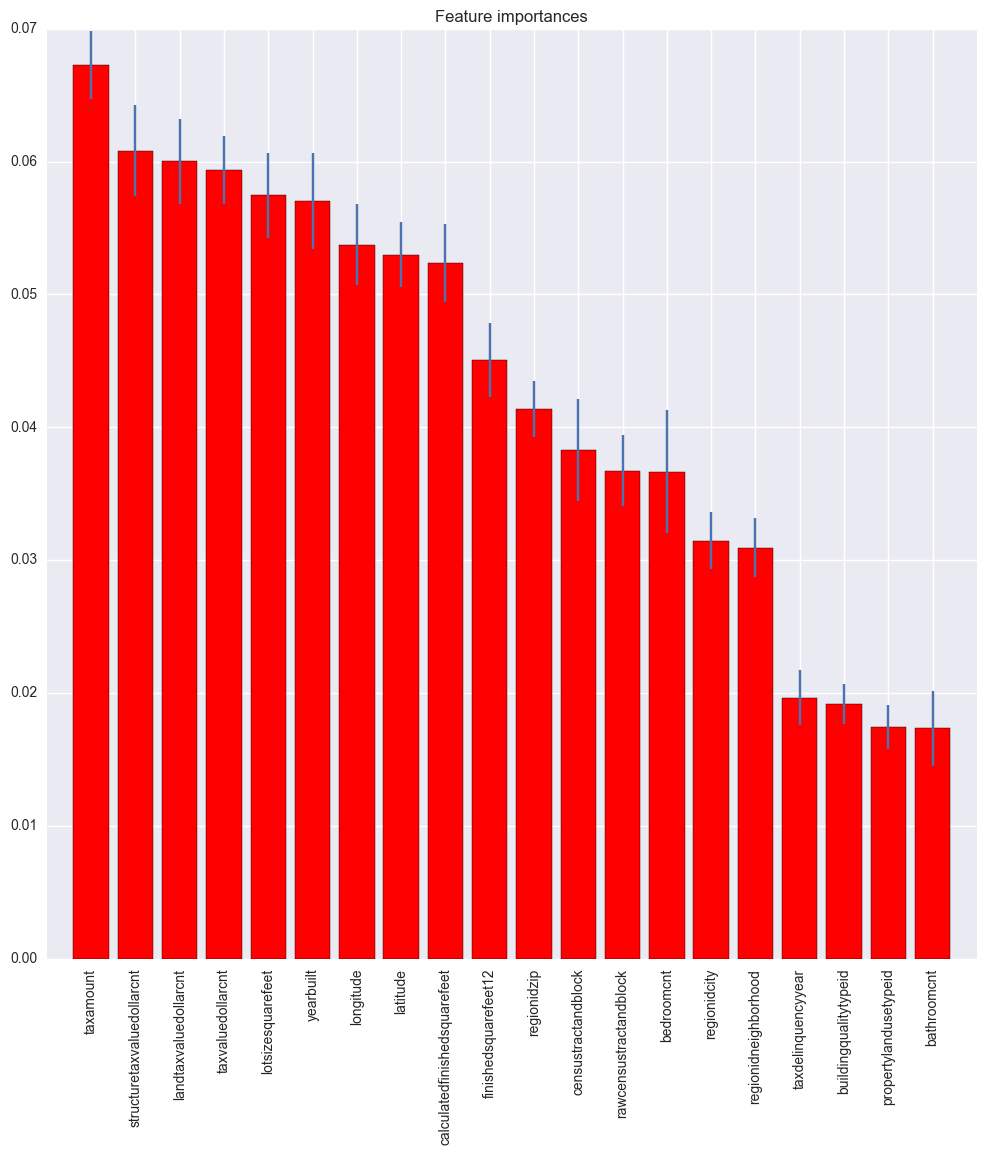

In [123]:
plt.figure(figsize=(12,12))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), feat_names[indices], rotation='vertical')
plt.xlim([-1, len(indices)])
plt.show()

AttributeError: Unknown property max_num_features

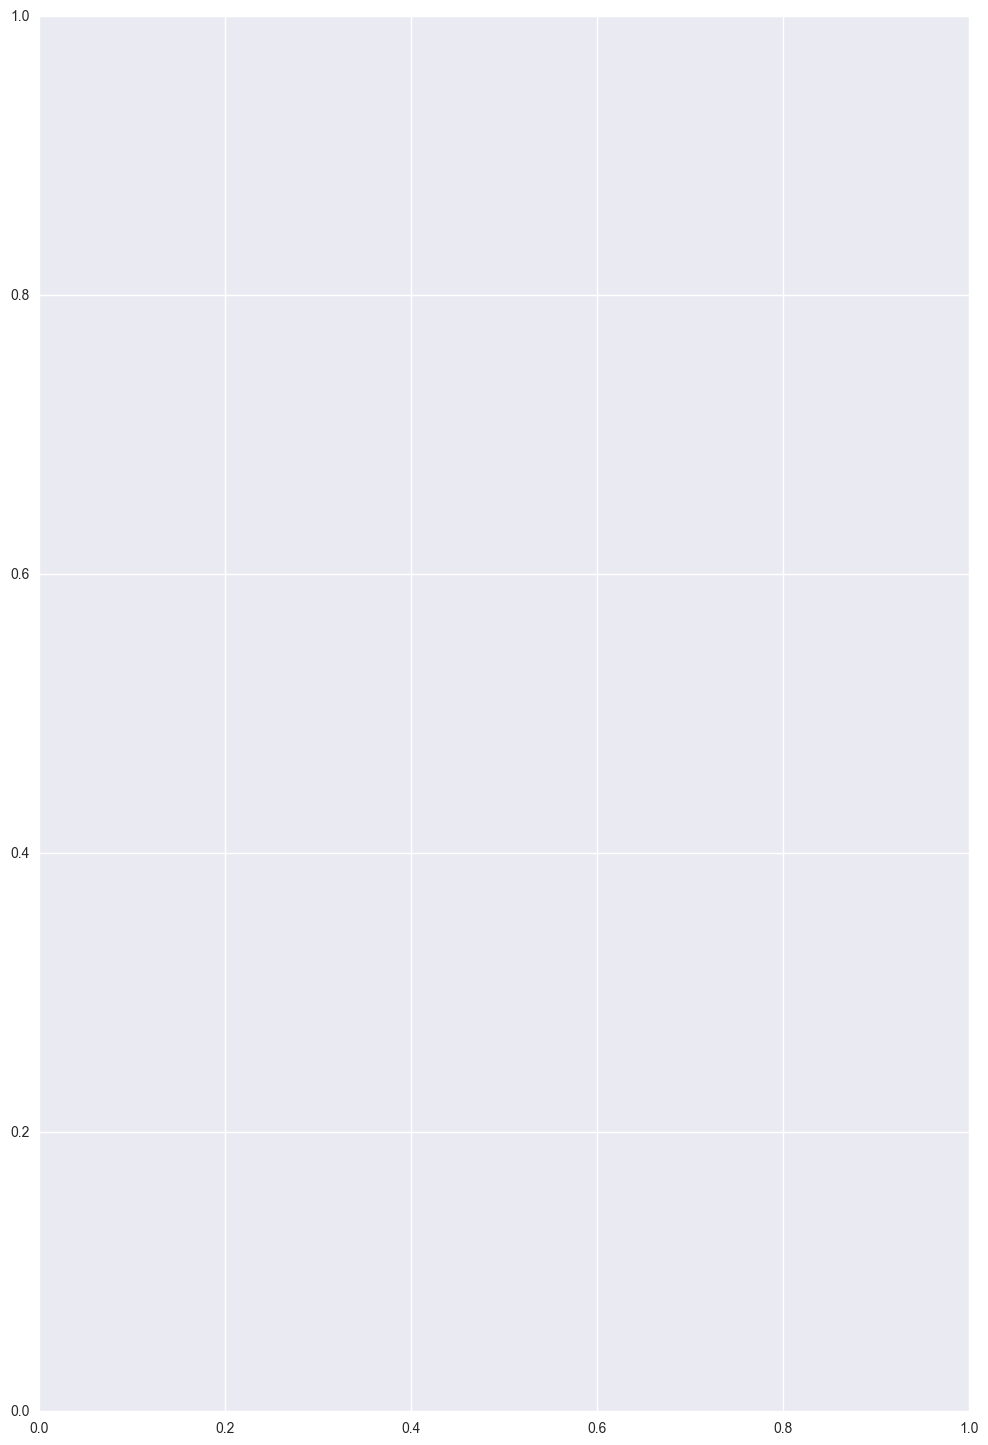

In [126]:
import xgboost as xgb
xgb_params = {
    'eta': 0.05,
    'max_depth': 8,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'silent': 1,
    'seed' : 0
}
dtrain = xgb.DMatrix(train_df, train_y, feature_names=train_df.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=50)

fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()